In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) 

c:\Users\Mei\anaconda3\envs\clean_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# only get DA jobs in the US
df_DA_US = df[
    (df['job_title_short'] =='Data Analyst') &
    (df['job_country']=='United States')
    ].copy()

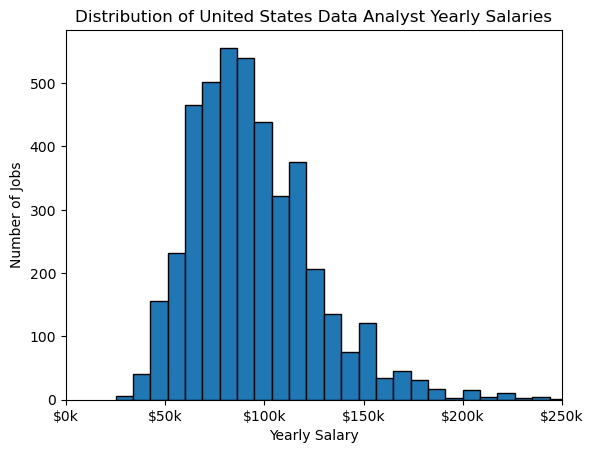

In [4]:
df_DA_US['salary_year_avg'].plot(
    kind='hist',
    bins=40,
    edgecolor='black'
)
plt.xlim(0,250000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

# Data Scientist Hourly Salaries

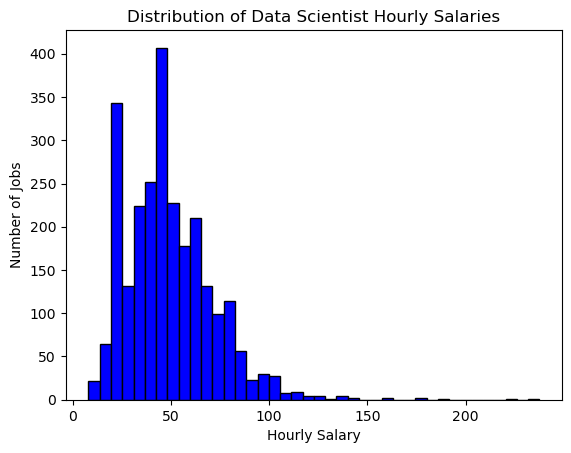

In [5]:
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_DS = df[df['job_title_short']=='Data Scientist'].copy()
df_DS['salary_hour_avg'].plot(
    kind='hist',
    bins=40,
    color='blue',
    edgecolor='black'
)
plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Data Scientist Hourly Salaries')
plt.show()

# Job Postings by Number of Skills 

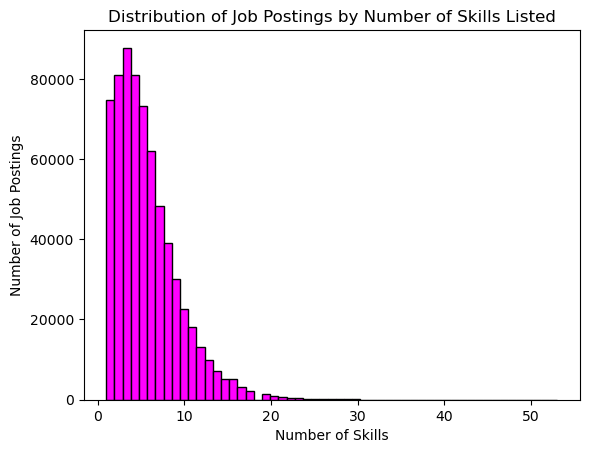

In [6]:
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_skills = df.dropna(subset=['job_skills']).copy()
df_skills['num_skills'] = df_skills['job_skills'].apply(len)


df_skills['num_skills'].plot(
    kind='hist',
    bins=55,
    color='magenta',
    edgecolor='black'
)

plt.xlabel('Number of Skills')
plt.ylabel('Number of Job Postings')
plt.title('Distribution of Job Postings by Number of Skills Listed')
plt.show()

# Data Engineer Salaries

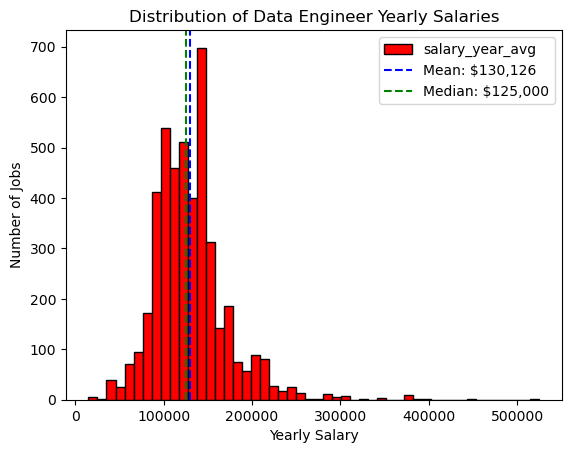

In [27]:
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

mean_salary = df_DE['salary_year_avg'].mean()
median_salary=df_DE['salary_year_avg'].median()

df_DE = df[df['job_title_short'] == 'Data Engineer'].copy()
df_DE['salary_year_avg'].plot(
    kind='hist',
    color='red',
    bins=50,
    edgecolor='black'
)
plt.axvline(
    x=mean_salary,
    color='blue',
    linestyle='--',
    label=f'Mean: ${mean_salary:,.0f}'
)

plt.axvline(
    x=median_salary,
    color='green',
    linestyle='--',
    label=f'Median: ${median_salary:,.0f}'
)
plt.legend()
plt.title('Distribution of Data Engineer Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()